## I. <font color=#800000>處理 ```NA``` 值</font>:

使用 ```yfinane``` 抓取Facebook 的十年股價為例，因為他在 2012 年 5 月才 IPO，因此在此之前的資料都會是 ```NA```。

In [2]:
import datetime as dt
import yfinance as yf
import pandas as pd

- 指定一個對 ```Data Frame```，裡面存放個股票的收盤價  
- 用 ```yf.download()``` 抓取資料

In [3]:
tickers = ["AMZN", "MSFT", "FB", "GOOG"] # target stocks
start = dt.datetime.today() - dt.timedelta(3650) # take 10 years(approx. 3650 days) data
end = dt.datetime.today()

cl_price = pd.DataFrame() 
for ticker in tickers:
    cl_price[ticker] = yf.download(ticker, start, end)["Adj Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
cl_price 

,AMZN,MSFT,FB,GOOG
Date,,,,
2011-01-25,176.699997,22.619738,NaN,308.797546
2011-01-26,175.389999,22.882114,NaN,307.098907
2011-01-27,184.449997,22.953665,NaN,307.243378
2011-01-28,171.139999,22.063190,NaN,299.372864
2011-01-31,169.639999,22.047285,NaN,299.059052
...,...,...,...,...
2021-01-14,3127.469971,213.020004,245.639999,1740.180054
2021-01-15,3104.250000,212.649994,251.360001,1736.189941
2021-01-19,3120.760010,216.440002,261.100006,1790.859985


### 兩種處理 ```NA``` 的方法: 填滿她(```.fillna()```) 或 丟棄她(```.dropna()```)

檢查資料會發現，Facebook 在 2012 年 5 月前都是沒有股價的，因此:  
#### 1. Use ```.fillna()```   
```.fillna()``` 有一個 ```method``` parameter:  
method : {'backfill', 'bfill', 'pad', 'ffill', None}  
其中，```backfill``` 跟 ```bfill``` 就是向前填充的意思(看到 ```NAN```，用其後第一個非 ```NAN``` 者填充)，  
```pad```與 ```ffill``` 則是向後填充。  
並且可以搭配 ```axis``` 來決定怎麼向後填充，記住: ```0``` 代表 column

In [5]:
cl_price.fillna(method="backfill", axis=0, inplace=True)
cl_price

,AMZN,MSFT,FB,GOOG
Date,,,,
2011-01-25,176.699997,22.619738,38.230000,308.797546
2011-01-26,175.389999,22.882114,38.230000,307.098907
2011-01-27,184.449997,22.953665,38.230000,307.243378
2011-01-28,171.139999,22.063190,38.230000,299.372864
2011-01-31,169.639999,22.047285,38.230000,299.059052
...,...,...,...,...
2021-01-14,3127.469971,213.020004,245.639999,1740.180054
2021-01-15,3104.250000,212.649994,251.360001,1736.189941
2021-01-19,3120.760010,216.440002,261.100006,1790.859985


#### 2. Use ```.dropna()```

In [6]:
cl_price.dropna(how='any', axis=1) 
# 只要有 ```NAN```，就全部刪除，因此日期被推延到 2012/05/18
# 如果 axis 是 1，就會把整個 FB 的 column 都刪掉，因為 FB column 裡含有 NAN

,AMZN,MSFT,FB,GOOG
Date,,,,
2011-01-25,176.699997,22.619738,38.230000,308.797546
2011-01-26,175.389999,22.882114,38.230000,307.098907
2011-01-27,184.449997,22.953665,38.230000,307.243378
2011-01-28,171.139999,22.063190,38.230000,299.372864
2011-01-31,169.639999,22.047285,38.230000,299.059052
...,...,...,...,...
2021-01-14,3127.469971,213.020004,245.639999,1740.180054
2021-01-15,3104.250000,212.649994,251.360001,1736.189941
2021-01-19,3120.760010,216.440002,261.100006,1790.859985


通常在 quant trading，都是用 ```.fillna()```，因為這樣才有較多資料做 backtesting。

## II. 計算每日報酬:

In [7]:
cl_price

,AMZN,MSFT,FB,GOOG
Date,,,,
2011-01-25,176.699997,22.619738,38.230000,308.797546
2011-01-26,175.389999,22.882114,38.230000,307.098907
2011-01-27,184.449997,22.953665,38.230000,307.243378
2011-01-28,171.139999,22.063190,38.230000,299.372864
2011-01-31,169.639999,22.047285,38.230000,299.059052
...,...,...,...,...
2021-01-14,3127.469971,213.020004,245.639999,1740.180054
2021-01-15,3104.250000,212.649994,251.360001,1736.189941
2021-01-19,3120.760010,216.440002,261.100006,1790.859985


現在我們有四支股票的收盤價格，就可以計算個股票的每日報酬，使用的 method 是 ```.pct_change()```

In [8]:
daily_return = cl_price.pct_change()
daily_return

,AMZN,MSFT,FB,GOOG
Date,,,,
2011-01-25,NaN,NaN,NaN,NaN
2011-01-26,-0.007414,0.011599,0.000000,-0.005501
2011-01-27,0.051656,0.003127,0.000000,0.000470
2011-01-28,-0.072160,-0.038794,0.000000,-0.025617
2011-01-31,-0.008765,-0.000721,0.000000,-0.001048
...,...,...,...,...
2021-01-14,-0.012136,-0.015346,-0.023844,-0.008105
2021-01-15,-0.007425,-0.001737,0.023286,-0.002293
2021-01-19,0.005319,0.017823,0.038749,0.031489


但如果要手動計算也是可以，這時要借助 ```.shift(數字)```

In [9]:
cl_price

,AMZN,MSFT,FB,GOOG
Date,,,,
2011-01-25,176.699997,22.619738,38.230000,308.797546
2011-01-26,175.389999,22.882114,38.230000,307.098907
2011-01-27,184.449997,22.953665,38.230000,307.243378
2011-01-28,171.139999,22.063190,38.230000,299.372864
2011-01-31,169.639999,22.047285,38.230000,299.059052
...,...,...,...,...
2021-01-14,3127.469971,213.020004,245.639999,1740.180054
2021-01-15,3104.250000,212.649994,251.360001,1736.189941
2021-01-19,3120.760010,216.440002,261.100006,1790.859985


In [10]:
cl_price.shift(1)

,AMZN,MSFT,FB,GOOG
Date,,,,
2011-01-25,NaN,NaN,NaN,NaN
2011-01-26,176.699997,22.619738,38.230000,308.797546
2011-01-27,175.389999,22.882114,38.230000,307.098907
2011-01-28,184.449997,22.953665,38.230000,307.243378
2011-01-31,171.139999,22.063190,38.230000,299.372864
...,...,...,...,...
2021-01-14,3165.889893,216.339996,251.639999,1754.400024
2021-01-15,3127.469971,213.020004,245.639999,1740.180054
2021-01-19,3104.250000,212.649994,251.360001,1736.189941


從上面的兩個 data frame 比較可以發現，所有股票的資料都下移一天，舉例來說，2011-01-26 的資料變成 2011-01-25 的資料，  
而 2011-01-25 就沒有資料了。  
意思就是，```.shift()``` 把前一天(n-1)的收盤價下移，因此，這便可以當作下一天(n)的開盤價。  
那這樣如果要計算 daily return，公式就會是: ```( cl_price / cl_price.shift(1) )- 1```

In [11]:
( cl_price / cl_price.shift(1) )- 1

,AMZN,MSFT,FB,GOOG
Date,,,,
2011-01-25,NaN,NaN,NaN,NaN
2011-01-26,-0.007414,0.011599,0.000000,-0.005501
2011-01-27,0.051656,0.003127,0.000000,0.000470
2011-01-28,-0.072160,-0.038794,0.000000,-0.025617
2011-01-31,-0.008765,-0.000721,0.000000,-0.001048
...,...,...,...,...
2021-01-14,-0.012136,-0.015346,-0.023844,-0.008105
2021-01-15,-0.007425,-0.001737,0.023286,-0.002293
2021-01-19,0.005319,0.017823,0.038749,0.031489


In [12]:
cl_price.pct_change()

,AMZN,MSFT,FB,GOOG
Date,,,,
2011-01-25,NaN,NaN,NaN,NaN
2011-01-26,-0.007414,0.011599,0.000000,-0.005501
2011-01-27,0.051656,0.003127,0.000000,0.000470
2011-01-28,-0.072160,-0.038794,0.000000,-0.025617
2011-01-31,-0.008765,-0.000721,0.000000,-0.001048
...,...,...,...,...
2021-01-14,-0.012136,-0.015346,-0.023844,-0.008105
2021-01-15,-0.007425,-0.001737,0.023286,-0.002293
2021-01-19,0.005319,0.017823,0.038749,0.031489


結果會跟直接套用 ```.pct_change()``` 一樣。

#### 計算 daily return 的統計值:

In [13]:
cl_price.pct_change().mean()

AMZN    0.001364
MSFT    0.001046
FB      0.001021
GOOG    0.000853
dtype: float64

In [14]:
cl_price.pct_change().std()

AMZN    0.019959
MSFT    0.016226
FB      0.021968
GOOG    0.016320
dtype: float64

注意到在這 10 年間，```AMZN``` 的平均報酬最好，而 ```FB``` 的 fluctuation 最大

## III. Simple Moving Average 與 Expontenial Moving Average

我們可以用 ``` Data Frame``` 裡的 ```.rolling()``` 與 ```.ewm()``` 來分別取得 ```SMA``` 與 ```EMA``` 的資料:

### Simple Moving Average Return

In [15]:
daily_return

,AMZN,MSFT,FB,GOOG
Date,,,,
2011-01-25,NaN,NaN,NaN,NaN
2011-01-26,-0.007414,0.011599,0.000000,-0.005501
2011-01-27,0.051656,0.003127,0.000000,0.000470
2011-01-28,-0.072160,-0.038794,0.000000,-0.025617
2011-01-31,-0.008765,-0.000721,0.000000,-0.001048
...,...,...,...,...
2021-01-14,-0.012136,-0.015346,-0.023844,-0.008105
2021-01-15,-0.007425,-0.001737,0.023286,-0.002293
2021-01-19,0.005319,0.017823,0.038749,0.031489


In [16]:
daily_return.rolling(window=20)

Rolling [window=20,center=False,axis=0]

上面套用 ```.rolling()``` method 後會回傳一個 Rolling instance。  
```window``` 的意思是窗口的大小。因為 SMA 是一天一天滑動，所以會先指定一個範圍，比如第 1 天到第 20 天為窗口，此時 SMA 移動 1 天，窗口就變成了第 2 天到第 21 天。

In [21]:
daily_return.rolling(window=20).mean()

,AMZN,MSFT,FB,GOOG
Date,,,,
2011-01-25,NaN,NaN,NaN,NaN
2011-01-26,NaN,NaN,NaN,NaN
2011-01-27,NaN,NaN,NaN,NaN
2011-01-28,NaN,NaN,NaN,NaN
2011-01-31,NaN,NaN,NaN,NaN
...,...,...,...,...
2021-01-14,-0.000488,-0.000162,-0.005580,-0.000711
2021-01-15,-0.002057,-0.001451,-0.004438,-0.000691
2021-01-19,-0.001716,-0.000592,-0.002284,0.001312


In [22]:
daily_return.rolling(window=20).std()

,AMZN,MSFT,FB,GOOG
Date,,,,
2011-01-25,NaN,NaN,NaN,NaN
2011-01-26,NaN,NaN,NaN,NaN
2011-01-27,NaN,NaN,NaN,NaN
2011-01-28,NaN,NaN,NaN,NaN
2011-01-31,NaN,NaN,NaN,NaN
...,...,...,...,...
2021-01-14,0.015244,0.014369,0.017655,0.012609
2021-01-15,0.014172,0.013191,0.018769,0.012606
2021-01-19,0.014268,0.013876,0.021108,0.014350


計算出股票報酬的移動平均。

### Exponential Moving Average Return

In [18]:
daily_return.ewm(span=20, min_periods=20)

ExponentialMovingWindow [com=9.5,min_periods=20,adjust=True,ignore_na=False,axis=0]

上面套用 ```.ewm()``` method 後會回傳一個 ExponentialMovingWindow instance。    
一樣可以套用統計 method。

In [20]:
daily_return.ewm(span=20, min_periods=20).mean()

,AMZN,MSFT,FB,GOOG
Date,,,,
2011-01-25,NaN,NaN,NaN,NaN
2011-01-26,NaN,NaN,NaN,NaN
2011-01-27,NaN,NaN,NaN,NaN
2011-01-28,NaN,NaN,NaN,NaN
2011-01-31,NaN,NaN,NaN,NaN
...,...,...,...,...
2021-01-14,-0.001536,-0.002065,-0.007657,-0.000857
2021-01-15,-0.002096,-0.002033,-0.004710,-0.000994
2021-01-19,-0.001390,-0.000142,-0.000571,0.002100


## IV. Data Visualization

目標: 畫出四張股票的平均 return 的 bar graph:

In [23]:
cl_price

,AMZN,MSFT,FB,GOOG
Date,,,,
2011-01-25,176.699997,22.619738,38.230000,308.797546
2011-01-26,175.389999,22.882114,38.230000,307.098907
2011-01-27,184.449997,22.953665,38.230000,307.243378
2011-01-28,171.139999,22.063190,38.230000,299.372864
2011-01-31,169.639999,22.047285,38.230000,299.059052
...,...,...,...,...
2021-01-14,3127.469971,213.020004,245.639999,1740.180054
2021-01-15,3104.250000,212.649994,251.360001,1736.189941
2021-01-19,3120.760010,216.440002,261.100006,1790.859985


In [29]:
import matplotlib.pyplot as plt

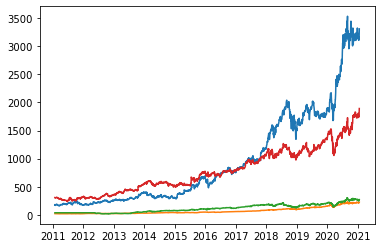

In [30]:
plt.plot(cl_price)

畫 bar graph:

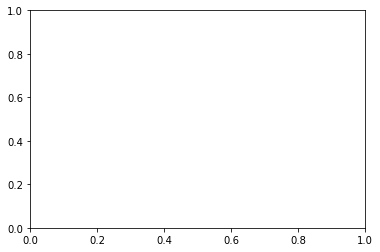

In [31]:
fig, ax = plt.subplots()

[Very good article!!! 參考這篇文章](https://pbpython.com/effective-matplotlib.html)，用 ```.subplots()``` 可以將主圖(```fig```) 跟 子圖(```ax```) 分開，這樣做的好處是可以個別客製化。

<BarContainer object of 4 artists>

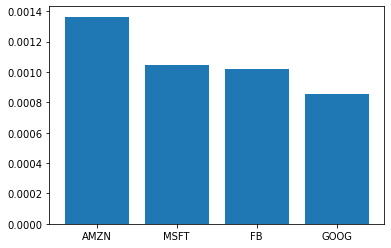

In [33]:
plt.bar(daily_return.columns, daily_return.mean())
# 第一個 parameter 放的是 x 軸的資料(也就是各股票)，第二個 parameter 放的是要表達的資料

這時最陽春的 plotting，講師有特別推薦使用 ```ggplot```:

In [36]:
plt.style.available # 查詢目前可用的 style

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [37]:
plt.style.use("ggplot") # set the style to "ggplot"

<BarContainer object of 4 artists>

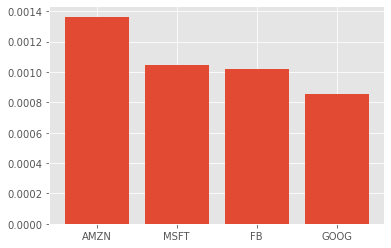

In [38]:
plt.bar(daily_return.columns, daily_return.mean()) # replot previous code again

<BarContainer object of 4 artists>

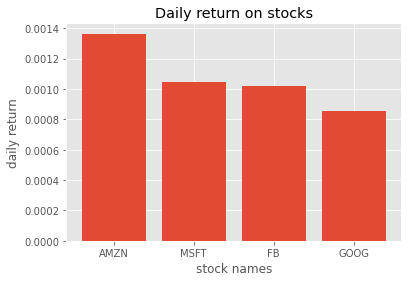

In [41]:
fig, ax = plt.subplots()
ax.set(title="Daily return on stocks", xlabel="stock names", ylabel="daily return")
plt.bar(daily_return.columns, daily_return.mean())